In [33]:
import tensorflow as tf
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [34]:
df = pd.read_csv("data/admission_predict.csv")
df = df.drop(['Serial No.'], axis=1)

In [35]:
corr_matrix = df.corr(method='pearson')

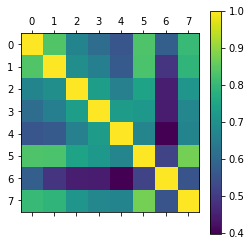

In [36]:
plt.matshow(corr_matrix)
plt.colorbar()
plt.show()

In [37]:
corr_matrix

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


In [38]:
temp_corr_matrix = corr_matrix.values
np.fill_diagonal(corr_matrix.values, 0)

corr_row_sum = []

for i in range (temp_corr_matrix.shape[0]):
    corr_row_sum.append(np.sum(temp_corr_matrix[i]))

    
print (corr_row_sum)

[4.891399472116577, 4.86713734444973, 4.664723359816676, 4.5728312021735125, 4.251950784913079, 5.191255145763167, 3.4337754451773117, 5.077566583690881]


In [39]:
np.fill_diagonal(corr_matrix.values, np.nan)

order_top2 = np.argsort(-corr_matrix.values, axis=1)[:, :6]
order_bottom = np.argsort(corr_matrix.values, axis=1)[:, :1]

result_top2 = pd.DataFrame(
    corr_matrix.columns[order_top2], 
    columns=['1st', '2nd', '3rd', '4th', '5th', '6th'],
    index=corr_matrix.index
)

result_bottom = pd.DataFrame(
    corr_matrix.columns[order_bottom], 
    columns=['Last'],
    index=corr_matrix.index
)

result = result_top2.join(result_bottom)

for x in result.columns:
    result[x+"_Val"] = corr_matrix.lookup(corr_matrix.index, result[x])
    



In [40]:

result.insert(0, "Corr Sum", corr_row_sum)
result

,Corr Sum,1st,2nd,3rd,4th,5th,6th,Last,1st_Val,2nd_Val,3rd_Val,4th_Val,5th_Val,6th_Val,Last_Val
GRE Score,4.891399,TOEFL Score,CGPA,Chance of Admit,University Rating,SOP,Research,LOR,0.835977,0.833060,0.802610,0.668976,0.612831,0.580391,0.557555
TOEFL Score,4.867137,GRE Score,CGPA,Chance of Admit,University Rating,SOP,LOR,Research,0.835977,0.828417,0.791594,0.695590,0.657981,0.567721,0.489858
University Rating,4.664723,CGPA,SOP,Chance of Admit,TOEFL Score,GRE Score,LOR,Research,0.746479,0.734523,0.711250,0.695590,0.668976,0.660123,0.447783
SOP,4.572831,University Rating,LOR,CGPA,Chance of Admit,TOEFL Score,GRE Score,Research,0.734523,0.729593,0.718144,0.675732,0.657981,0.612831,0.444029
LOR,4.251951,SOP,CGPA,Chance of Admit,University Rating,TOEFL Score,GRE Score,Research,0.729593,0.670211,0.669889,0.660123,0.567721,0.557555,0.396859
CGPA,5.191255,Chance of Admit,GRE Score,TOEFL Score,University Rating,SOP,LOR,Research,0.873289,0.833060,0.828417,0.746479,0.718144,0.670211,0.521654
Research,3.433775,GRE Score,Chance of Admit,CGPA,TOEFL Score,University Rating,SOP,LOR,0.580391,0.553202,0.521654,0.489858,0.447783,0.444029,0.396859
Chance of Admit,5.077567,CGPA,GRE Score,TOEFL Score,University Rating,SOP,LOR,Research,0.873289,0.802610,0.791594,0.711250,0.675732,0.669889,0.553202
